In [36]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap
from pylab import rcParams
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [43]:
# Load data
df = pd.read_csv("../Data/final_data.csv")

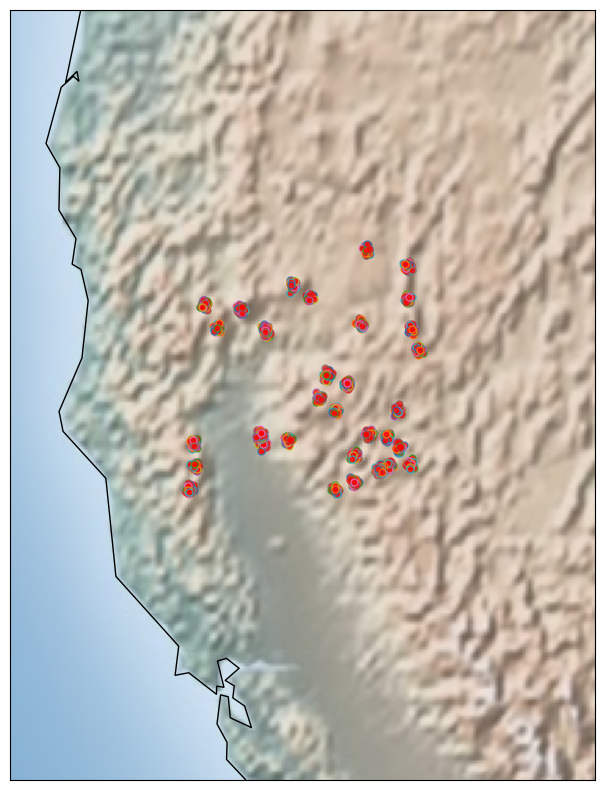

In [44]:
#plot data

rcParams["figure.figsize"] = (14, 10)
llon = -125
ulon = -118
llat = 37
ulat = 44
df = df[
    (df["x_coord"] > llon) & (df["x_coord"] < ulon) & (df["y_coord"] > llat) & (df["y_coord"] < ulat)
]

my_map = Basemap(
    projection="merc",
    resolution="l",
    area_thresh=1000.0,
    llcrnrlon=llon,
    llcrnrlat=llat,
    urcrnrlon=ulon,
    urcrnrlat=ulat,
)
my_map.drawcoastlines()
my_map.drawcountries()
my_map.shadedrelief()


unlabeled = df.drop('County', axis=1)

unlabeled['xvar'] = np.random.normal(0, 0.02, unlabeled.shape[0])
unlabeled['yvar'] = np.random.normal(0, 0.02, unlabeled.shape[0])

#add a little variation so points are not plotted directly over each other
unlabeled['x_coord'] += unlabeled['xvar']
unlabeled['y_coord'] += unlabeled['yvar']

xs, ys = my_map(np.asarray(unlabeled.x_coord), np.asarray(unlabeled.y_coord))
df["xm"] = xs.tolist()
df["ym"] = ys.tolist()

# plot the stations on the map
for index, row in df.iterrows():
    my_map.plot(
        row.xm,
        row.ym,
        markerfacecolor=([1, 0, 0]),
        marker="o",
        markersize=5,
        alpha=0.75,
    )
plt.show()

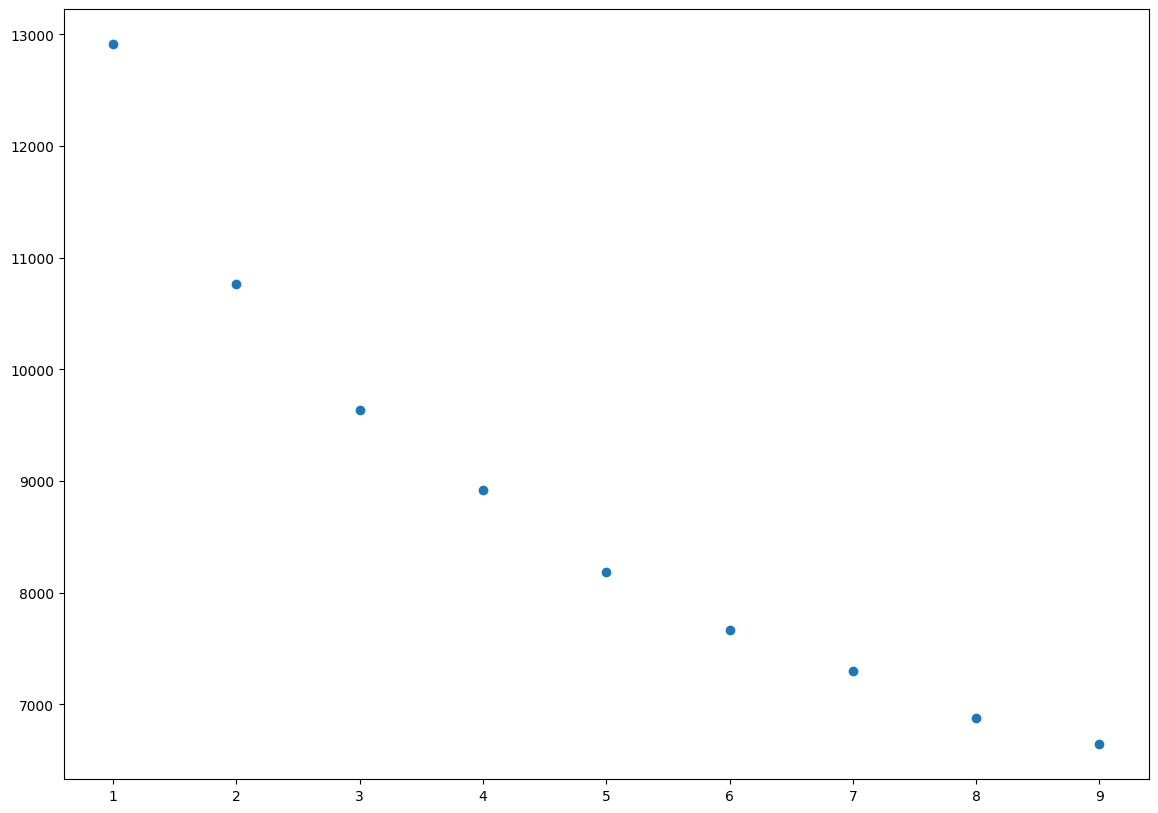

In [45]:
scaled = StandardScaler().fit_transform(unlabeled)
costs = []

#fit kmeans model and plot errors
for groups in range(1,10):
    km = KMeans(n_clusters=groups, tol=0.0000001, random_state=0, n_init='auto').fit(scaled)
    costs.append(km.inertia_)

plt.scatter(x=range(1,10), y=costs)

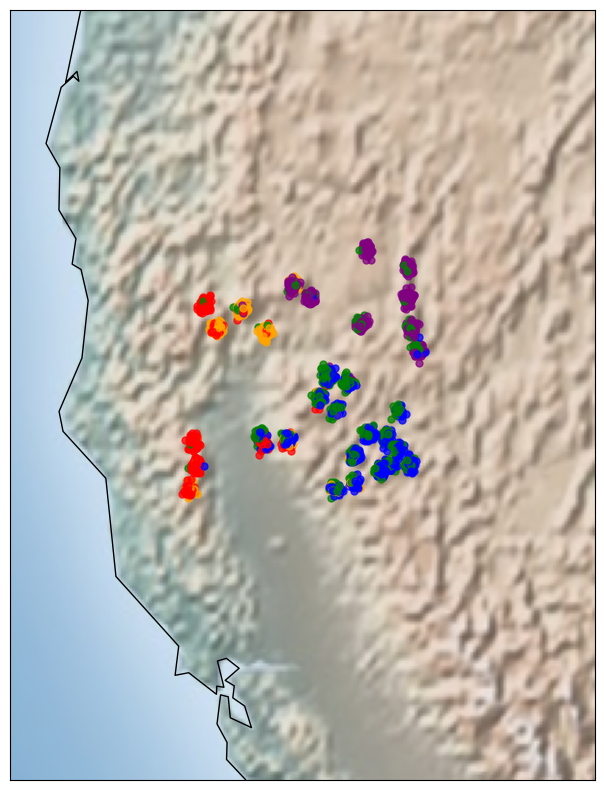

In [47]:
#pick clusters = 4 from looking at the elbow plot
km2 = KMeans(n_clusters=5, tol=0.0000001, random_state=0, n_init='auto').fit(scaled)
labels = km2.labels_
centers = km2.cluster_centers_

#plot clustering results
rcParams["figure.figsize"] = (14, 10)
llon = -125
ulon = -118
llat = 37
ulat = 44
df = unlabeled

## this is to change longitude and latitude to coordinates

unlabeled['xvar'] = np.random.normal(0, 0.02, unlabeled.shape[0])
unlabeled['yvar'] = np.random.normal(0, 0.02, unlabeled.shape[0])

#add a little variation so points are not plotted directly over each other
unlabeled['x_coord'] += unlabeled['xvar']
unlabeled['y_coord'] += unlabeled['yvar']

xs, ys = my_map(np.asarray(df.x_coord), np.asarray(df.y_coord))
df["xm"] = xs.tolist()
df["ym"] = ys.tolist()

my_map = Basemap(
    projection="merc",
    resolution="l",
    area_thresh=1000.0,
    llcrnrlon=llon,
    llcrnrlat=llat,
    urcrnrlon=ulon,
    urcrnrlat=ulat,
)
my_map.drawcoastlines()
my_map.drawcountries()
my_map.shadedrelief()

colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']
for index, label in enumerate(labels):
    my_map.plot(xs[index], ys[index], marker='o', markersize=5, color=colors[int(label)], alpha=0.75)

plt.show()